In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/weatherHistory.csv')

In [3]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
#dropping unnecessary columns
df.drop(['Formatted Date','Summary','Daily Summary'],axis=1,inplace=True)

In [5]:
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [6]:
#feature scalling
def encode(data):
  if data == 'rain':
    return 1
  else:
    return 0

In [7]:
df.dropna(inplace=True)

In [8]:
df['Precip Type'] = df['Precip Type'].apply(encode)

In [9]:
#trimming data for prediction
test_data = df.iloc[80000:]
df = df.drop(test_data.index)

In [10]:
test_output = test_data['Precip Type']
test_data = test_data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)']]

In [11]:
test_output.value_counts()

,count
Precip Type,
1,14619
0,1317


In [12]:

x = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)']]
y = df['Precip Type']

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 0 to 80142
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           80000 non-null  float64
 1   Apparent Temperature (C)  80000 non-null  float64
 2   Humidity                  80000 non-null  float64
 3   Pressure (millibars)      80000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
model.score(x_test,y_test)

0.993875

In [20]:
test_data = stand.transform(test_data)

In [21]:
model.predict(test_data)

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
model.score(test_data,test_output)

0.9949799196787149

In [23]:
from sklearn.model_selection import GridSearchCV
#make sure the syntax is proper and the penalties are compatible with the solver
parameter ={'penalty':['l2'] , 'C':[0.001,0.01,0.1,1,10,100,1000],'max_iter':[100,200,1000]}

tuned_model = GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')

tuned_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 1000], 'penalty': ['l2']},
             scoring='accuracy')

In [24]:
tuned_model.score(test_data,test_output)

0.998995983935743

In [25]:
tuned_model.score(x_test,y_test)

0.9993125

In [26]:
tuned_model.score(x_train,y_train)

0.999140625

In [27]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(test_output,tuned_model.predict(test_data))
print(score)
print(classification_report(test_output,tuned_model.predict(test_data)))

0.998995983935743
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1317
           1       1.00      1.00      1.00     14619

    accuracy                           1.00     15936
   macro avg       0.99      1.00      1.00     15936
weighted avg       1.00      1.00      1.00     15936



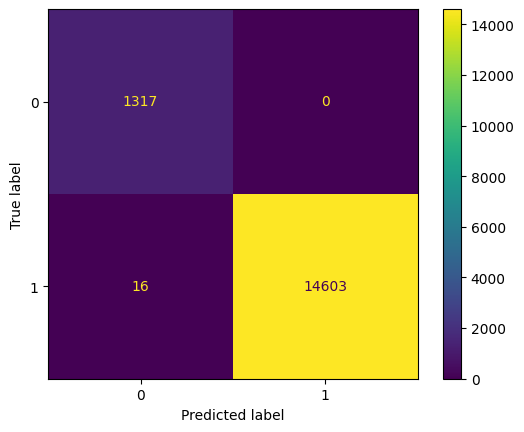

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(test_output,tuned_model.predict(test_data))
ConfusionMatrixDisplay(conf_matrix).plot()

In [29]:
proba = tuned_model.predict_proba(test_data)
proba

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [30]:
best_model = tuned_model.best_estimator_
best_model.coef_

array([[4.21311906e+02, 1.35886513e-01, 4.36745241e-01, 2.32203097e-01]])